In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_reserve_prices(num_fish, low=900, high=1000, pdf_low=0.005):
    """Generate reserve prices for goldfish, linearly more likely towards the high end,
    starting from a non-zero PDF at low."""
    b = pdf_low
    a = (1.0 - 100 * b) / 5000

    # Generate uniform random numbers from 0 to 1
    q = np.random.rand(num_fish)

    # Calculate the reserve prices using the inverse CDF formula derived
    discriminant = np.sqrt(b**2 + 2 * a * q)
    u = (-b + discriminant) / a

    reserve_prices = low + u
    return reserve_prices

In [3]:
def simulate_bids(reserve_prices, bid1, bid2):
    """Simulate trading with two bid prices and calculate the number of sales and profit."""
    sales1 = np.sum(reserve_prices <= bid1)
    sales2 = np.sum((reserve_prices > bid1) & (reserve_prices <= bid2))
    
    total_sales = sales1 + sales2
    total_profit = total_sales * 1000 - (sales1 * bid1 + sales2 * bid2)

    avg_profit = total_profit / len(reserve_prices)
    
    return avg_profit

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001
 0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019 0.002
 0.0021 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027 0.0028 0.0029 0.003
 0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037 0.0038 0.0039 0.004
 0.0041 0.0042 0.0043 0.0044 0.0045 0.0046 0.0047 0.0048 0.0049 0.005 ]


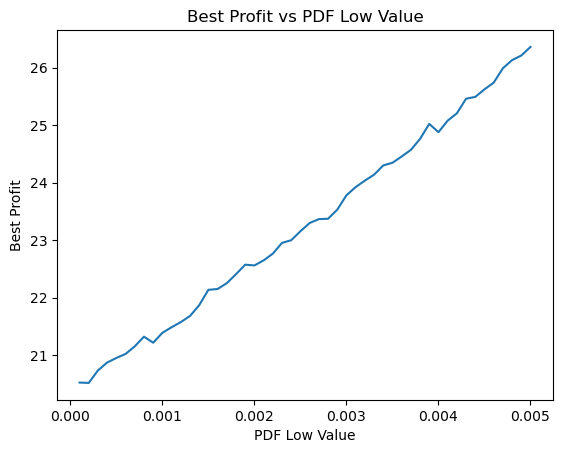

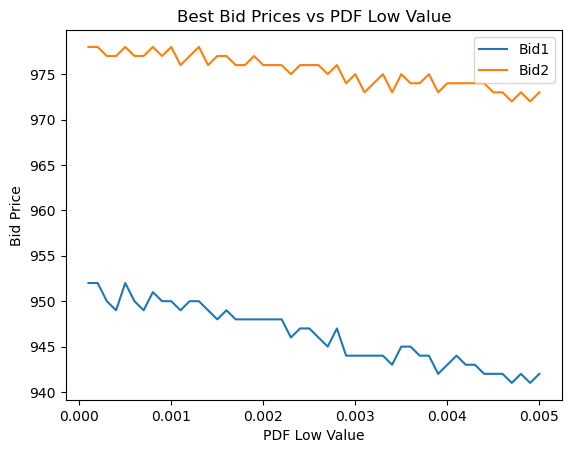

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001
 0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019 0.002
 0.0021 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027 0.0028 0.0029 0.003
 0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037 0.0038 0.0039 0.004
 0.0041 0.0042 0.0043 0.0044 0.0045 0.0046 0.0047 0.0048 0.0049 0.005 ]
[952, 952, 950, 949, 952, 950, 949, 951, 950, 950, 949, 950, 950, 949, 948, 949, 948, 948, 948, 948, 948, 948, 946, 947, 947, 946, 945, 947, 944, 944, 944, 944, 944, 943, 945, 945, 944, 944, 942, 943, 944, 943, 943, 942, 942, 942, 941, 942, 941, 942]
[978, 978, 977, 977, 978, 977, 977, 978, 977, 978, 976, 977, 978, 976, 977, 977, 976, 976, 977, 976, 976, 976, 975, 976, 976, 976, 975, 976, 974, 975, 973, 974, 975, 973, 975, 974, 974, 975, 973, 974, 974, 974, 974, 974, 973, 973, 972, 973, 972, 973]


In [4]:
num_fish = 100000

# loop through different pdf_low values from 0.0001 to 0.005 to see how it affects the best profit distribution
pdf_lows = np.linspace(0.0001, 0.005, 50)
print(pdf_lows)
best_profits = []

# record the best bid1 and bid2 values for each pdf_low
best_bid1s = []
best_bid2s = []

for pdf_low in pdf_lows:
    reserve_prices = generate_reserve_prices(num_fish, pdf_low=pdf_low)
    best_profit = 0
    # loop through different bid1 values from 900 to 999, and bid2 values from 901 to 1000
    for bid1 in range(900, 1000):
        for bid2 in range(bid1 + 1, 1001):
            profit = simulate_bids(reserve_prices, bid1, bid2)
            if profit > best_profit:
                best_profit = profit
                best_bid1 = bid1
                best_bid2 = bid2
    best_profits.append(best_profit)
    best_bid1s.append(best_bid1)
    best_bid2s.append(best_bid2)


In [ ]:
plt.plot(pdf_lows, best_profits)
plt.xlabel('PDF Low Value')
plt.ylabel('Best Profit')
plt.title('Best Profit vs PDF Low Value')
plt.show()

plt.plot(pdf_lows, best_bid1s, label='Bid1')
plt.plot(pdf_lows, best_bid2s, label='Bid2')
plt.xlabel('PDF Low Value')
plt.ylabel('Bid Price')
plt.title('Best Bid Prices vs PDF Low Value')
plt.legend()
plt.show()
            
print(best_bid1s)

print(best_bid2s)